### Preamble
### Employee turnover is the process of employees leaving the company, also known as employee churn or attrition, may result in high cost for the company. It may affect company's hiring or retention decisions

In [43]:
# import library
import pandas as pd
import chardet
file="turnover.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [44]:
data=pd.read_csv(file,encoding='ascii')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects).
No variable column has null/missing values.
You can describe 10 attributes in detail as:

1. satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
2. last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
3. number_projects: How many numbers of projects assigned to an employee?
4. average_monthly_hours: How many average numbers of hours worked by an employee in a month?
5. time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
6. work_accident: Whether an employee has had a work accident or not.
7. promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
8. Departments: Employee's working department/division.
8. Salary: Salary level of the employee such as low, medium and high.
10. left: Whether the employee has left the company or not.

In [40]:
for column in data.columns:
    if data[column].dtypes==object:
        print(f" No of categories in {column} is {data[column].nunique()} \n ")
        print(f"Categories of column {column} are {data[column].unique()}")
        print("*"*100)

 No of categories in department is 10 
 
Categories of column department are ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
****************************************************************************************************
 No of categories in salary is 3 
 
Categories of column salary are ['low' 'medium' 'high']
****************************************************************************************************


Here, salary is ordinal categorical type and department is norminal categorical variable (do not have intrinsic order)

In [16]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Transforming categorical variables

In [42]:
#salary column to categorical type
data.salary=data.salary.astype('category')
data.salary=data.salary.cat.reorder_categories(['low','medium','high'])
data.salary=data.salary.cat.codes
data.salary.unique()

array([0, 1, 2], dtype=int8)

In [18]:
departments=pd.get_dummies(data.department)

In [19]:
departments

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [20]:
#Drop one of the column to avoid dummy trap
departments=departments.drop("accounting",axis=1)

In [21]:
#drop the old column department

data=data.drop("department",axis=1)
#join one hot encoded columns
data=data.join(departments)

### Descriptive Statistics

In [26]:
#percentage of employees who left/stayed
print(data.left.value_counts()/len(data)*100)

0    76.191746
1    23.808254
Name: left, dtype: float64


stayed:76.2%  left 23.8%

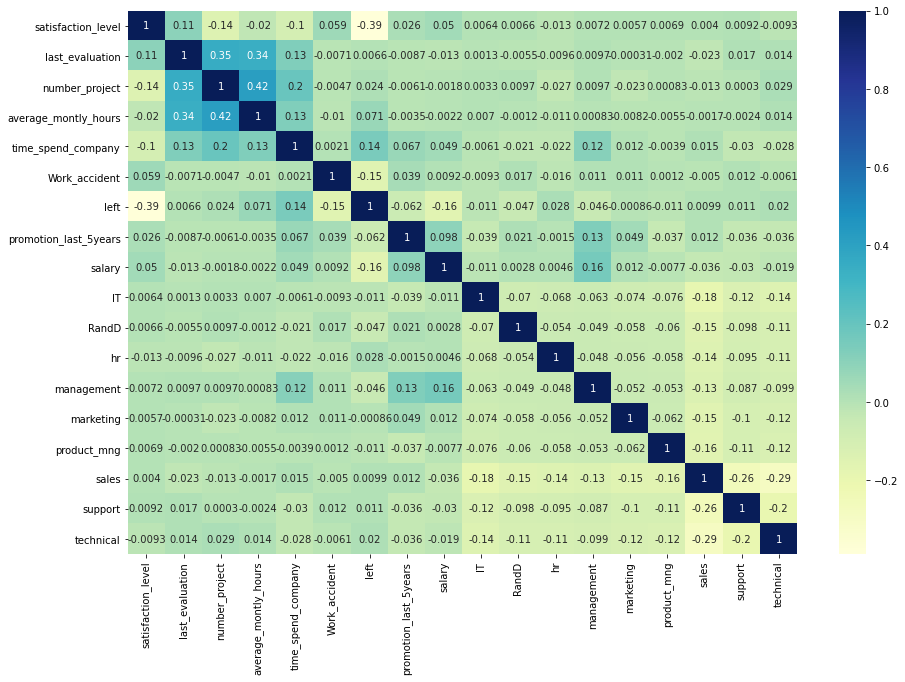

In [34]:
## Data correlations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,cmap="YlGnBu",annot=True)
plt.show()

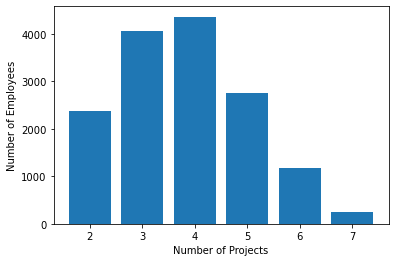

In [35]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing projects from 3-5

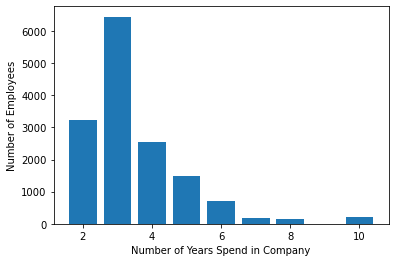

In [36]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

In [47]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

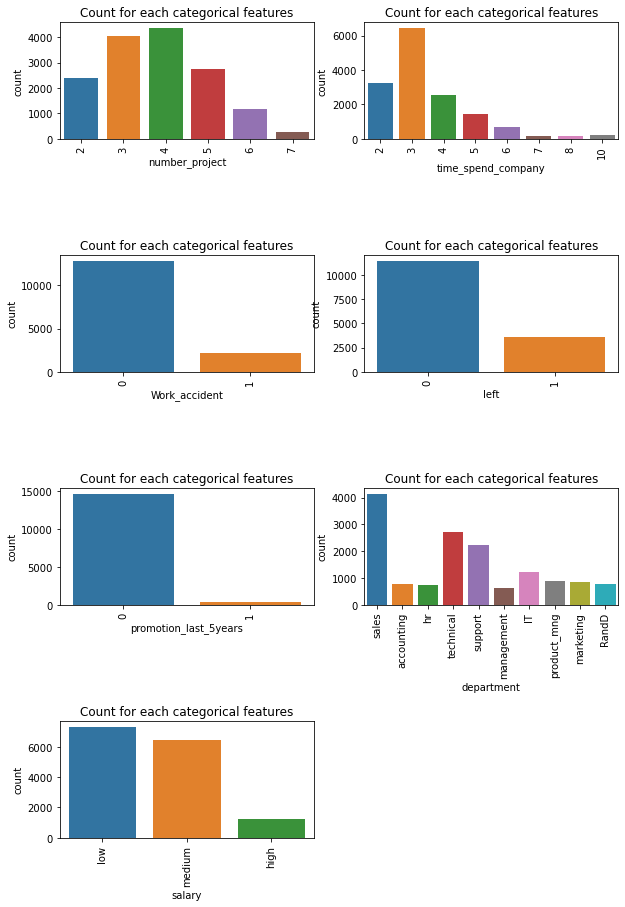

In [49]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','department','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("Count for each categorical features")

1. Most of the employee is doing the project from 3-5.
2. There is a huge drop between 3 years and 4 years experienced employee.
3. The no of employee left is 23 % of the total employment.
4. A decidedly less number of employee get the promotion in the last 5 year.
5. The sales department is having maximum no.of employee followed by technical and support
6. Most of the employees are getting salary either medium or low.

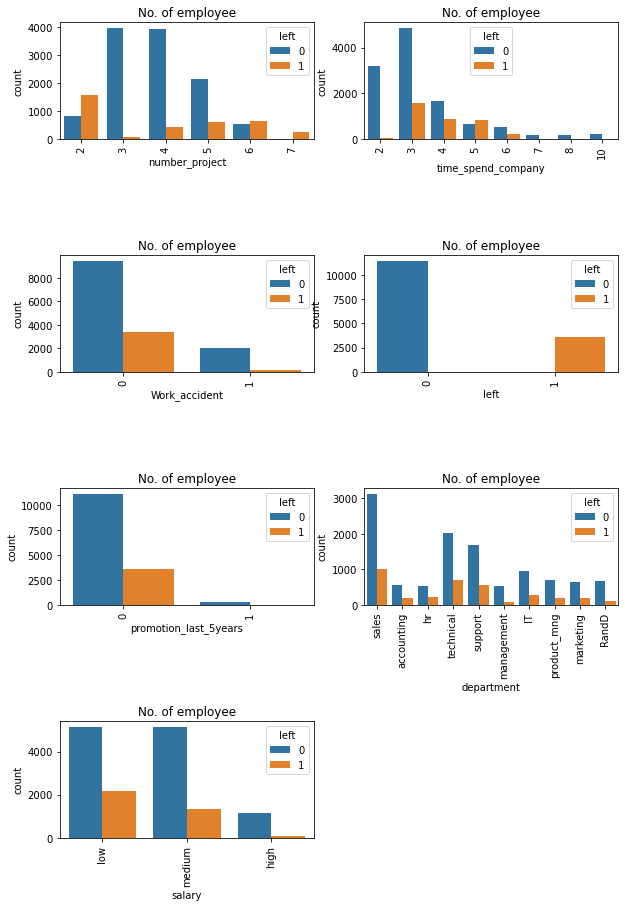

In [50]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

1. Those employees who have the number of projects more than 5 were left the company.
2. The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
3. The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
4. Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

## Data Analysis and Visualization Summary:
### Following features are most influencing a person to leave the company:

1. Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.
2. Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
3. Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
4. Salary: Most of the employees that quit among the mid or low salary groups.

## Cluster Analysis

In [51]:
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

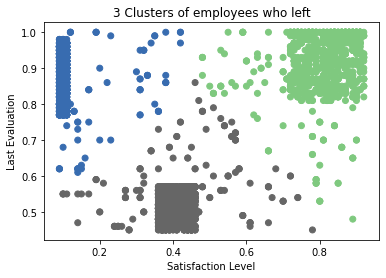

In [52]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Employee who left the company can be grouped into 3 type of employees:

1. High Satisfaction and High Evaluation(Shaded by green color in the graph)
2. Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph)
3. Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph)

### Building Predictive Model

In [55]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['department']=le.fit_transform(data['department'])

In [57]:
#Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary']]
y=data['left']

In [58]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [59]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806
